In [1]:
!pip install --quiet vit-keras
from vit_keras import vit  

DEPRECATION: pyodbc 4.0.0-unsupported has a non-standard version number. pip 23.3 will enforce this behaviour change. A possible replacement is to upgrade to a newer version of pyodbc or contact the author to suggest that they release a version with a conforming version number. Discussion can be found at https://github.com/pypa/pip/issues/12063

[notice] A new release of pip is available: 23.2.1 -> 23.3.2
[notice] To update, run: python.exe -m pip install --upgrade pip
C:\Users\user\anaconda3\lib\site-packages\tensorflow_addons\utils\tfa_eol_msg.py:23: UserWarning: 

TensorFlow Addons (TFA) has ended development and introduction of new features.
TFA has entered a minimal maintenance and release mode until a planned end of life in May 2024.
Please modify downstream libraries to take dependencies from other repositories in our TensorFlow community (e.g. Keras, Keras-CV, and Keras-NLP). 

For more information see: https://github.com/tensorflow/addons/issues/2807 

  warnings.warn(


In [2]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, MaxPooling2D, Flatten
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import sklearn
import keras
from keras.models import *
from keras.layers import *
from keras.optimizers import *
from keras.callbacks import *
from tensorflow.keras.applications import *
from keras.preprocessing.image import ImageDataGenerator
import seaborn as sns
import tensorflow_datasets as tfds
import tensorflow_hub as hub
import tensorflow_addons as tfa
from time import time
import glob, warnings
from sklearn.metrics import confusion_matrix, classification_report
warnings.filterwarnings('ignore')

import numpy as np
from sklearn.model_selection import train_test_split
from efficientnet.keras import EfficientNetB0
from tensorflow.keras.layers import GlobalAveragePooling2D, Dense
from tensorflow.keras.models import Model
from PIL import Image



In [3]:
from PIL import Image
import numpy as np
from sklearn.model_selection import train_test_split


# Load the data and labels from the saved NumPy arrays
data_array = np.load('D:\WESAD_code\WESAD_DATA_LABELSARRAY_FINAL\Subject_array\data_array.npy')
labels_array = np.load('D:\WESAD_code\WESAD_DATA_LABELSARRAY_FINAL\Labels_array\label_array.npy')

In [4]:
print(data_array.shape)
print(labels_array.shape)

(16492, 224, 224, 3)
(16492, 3)


In [5]:
####SEED_0

import numpy as np
from sklearn.model_selection import train_test_split

# Assuming the dataset is stored in the variable `data_array` and the corresponding labels in `labels_array`

# Splitting the dataset into 75% training, 5% validation, and 20% testing
X_train_val, X_test, y_train_val, y_test = train_test_split(data_array, labels_array, test_size=0.2, random_state=0)
X_train, X_val, y_train, y_val = train_test_split(X_train_val, y_train_val, test_size=0.0625, random_state=0)

# Checking the shape of each set
print("Training data shape:", X_train.shape)
print("Training labels shape:", y_train.shape)
print("Validation data shape:", X_val.shape)
print("Validation labels shape:", y_val.shape)
print("Testing data shape:", X_test.shape)
print("Testing labels shape:", y_test.shape)

Training data shape: (12368, 224, 224, 3)
Training labels shape: (12368, 3)
Validation data shape: (825, 224, 224, 3)
Validation labels shape: (825, 3)
Testing data shape: (3299, 224, 224, 3)
Testing labels shape: (3299, 3)


In [18]:
X_train[0]

array([[[ 70., 202., 171.],
        [ 70., 202., 171.],
        [ 70., 202., 171.],
        ...,
        [ 73., 203., 169.],
        [ 73., 203., 169.],
        [ 73., 203., 169.]],

       [[ 67., 200., 173.],
        [ 67., 200., 173.],
        [ 67., 200., 173.],
        ...,
        [ 65., 199., 174.],
        [ 65., 199., 174.],
        [ 65., 199., 174.]],

       [[ 67., 200., 173.],
        [ 67., 200., 173.],
        [ 67., 200., 173.],
        ...,
        [ 65., 199., 174.],
        [ 65., 199., 174.],
        [ 65., 199., 174.]],

       ...,

       [[ 11.,  12., 117.],
        [ 11.,  12., 117.],
        [ 11.,  12., 117.],
        ...,
        [  4.,   7.,  98.],
        [  4.,   7.,  98.],
        [  4.,   7.,  98.]],

       [[  6., 112., 252.],
        [  6., 112., 252.],
        [  6., 112., 252.],
        ...,
        [ 11., 134., 238.],
        [ 11., 134., 238.],
        [ 11., 134., 238.]],

       [[  6., 110., 249.],
        [  6., 110., 249.],
        [  6., 1

In [6]:
import tensorflow as tf

IMG_SIZE = 224

pretrained_model =    vit.vit_b32(
        image_size = IMG_SIZE,
        activation = 'softmax',
        pretrained = True,
        include_top = False,
        pretrained_top = False,
        classes = 3)


pretrained_model.trainable = False

pretrained_model.summary()

Model: "vit-b32"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 embedding (Conv2D)          (None, 7, 7, 768)         2360064   
                                                                 
 reshape (Reshape)           (None, 49, 768)           0         
                                                                 
 class_token (ClassToken)    (None, 50, 768)           768       
                                                                 
 Transformer/posembed_input  (None, 50, 768)           38400     
  (AddPositionEmbs)                                              
                                                                 
 Transformer/encoderblock_0  ((None, 50, 768),         7087872   
  (TransformerBlock)          (None, 12, None, None)       

In [7]:
#x = pretrained_model.output
#print(x)

KerasTensor(type_spec=TensorSpec(shape=(None, 768), dtype=tf.float32, name=None), name='ExtractToken/strided_slice:0', description="created by layer 'ExtractToken'")


In [8]:
#model = tf.keras.models.Model(inputs=base_model.input, outputs=base_model.get_layer(target_layer_name).output)

# Prepare an example input (you should replace this with your actual input data)
#input_data = tf.random.normal((1, 224, 224, 3))  # Adjust the shape based on your input requirements

# Pass the input through the model to get embeddings
#embeddings = pretrained_model.predict(input_data)

1/1 [==============================] - 3s 3s/step


In [9]:
#print(embeddings.shape)

(1, 768)


In [10]:
pip install tensorflow numpy

  Obtaining dependency information for protobuf!=4.21.0,!=4.21.1,!=4.21.2,!=4.21.3,!=4.21.4,!=4.21.5,<5.0.0dev,>=3.20.3 from https://files.pythonhosted.org/packages/b6/4b/f4f3334784576822d7817a664b757030ebb35b981978baf9c2eb3c5f33a8/protobuf-4.25.1-cp39-cp39-win_amd64.whl.metadataNote: you may need to restart the kernel to use updated packages.
  Obtaining dependency information for tensorflow-estimator<2.14,>=2.13.0 from https://files.pythonhosted.org/packages/72/5c/c318268d96791c6222ad7df1651bbd1b2409139afeb6f468c0f327177016/tensorflow_estimator-2.13.0-py2.py3-none-any.whl.metadata
  Using cached tensorflow_estimator-2.13.0-py2.py3-none-any.whl.metadata (1.3 kB)
  Obtaining dependency information for keras<2.14,>=2.13.1 from https://files.pythonhosted.org/packages/2e/f3/19da7511b45e80216cbbd9467137b2d28919c58ba1ccb971435cb631e470/keras-2.13.1-py3-none-any.whl.metadata
  Using cached keras-2.13.1-py3-none-any.whl.metadata (2.4 kB)



DEPRECATION: pyodbc 4.0.0-unsupported has a non-standard version number. pip 23.3 will enforce this behaviour change. A possible replacement is to upgrade to a newer version of pyodbc or contact the author to suggest that they release a version with a conforming version number. Discussion can be found at https://github.com/pypa/pip/issues/12063
ERROR: Could not install packages due to an OSError: [WinError 5] Access is denied: 'C:\\Users\\user\\anaconda3\\Lib\\site-packages\\google\\~=otobuf\\internal\\_api_implementation.cp39-win_amd64.pyd'
Consider using the `--user` option or check the permissions.


[notice] A new release of pip is available: 23.2.1 -> 23.3.2
[notice] To update, run: python.exe -m pip install --upgrade pip


Using cached keras-2.13.1-py3-none-any.whl (1.7 MB)
   -------------------------------------- 413.4/413.4 kB 348.7 kB/s eta 0:00:00
Using cached tensorflow_estimator-2.13.0-py2.py3-none-any.whl (440 kB)
  Attempting uninstall: typing-extensions
    Found existing installation: typing_extensions 4.8.0
    Uninstalling typing_extensions-4.8.0:
      Successfully uninstalled typing_extensions-4.8.0
  Attempting uninstall: tensorflow-estimator
    Found existing installation: tensorflow-estimator 2.14.0
    Uninstalling tensorflow-estimator-2.14.0:
      Successfully uninstalled tensorflow-estimator-2.14.0
  Attempting uninstall: protobuf
    Found existing installation: protobuf 3.20.2
    Uninstalling protobuf-3.20.2:
      Successfully uninstalled protobuf-3.20.2


In [11]:
import numpy as np
import tensorflow as tf

# Assuming you have loaded your model and X_train before this point

# Function to extract embeddings from images using the ViT model
def extract_embeddings(model, images):
    embeddings_array = []
    for img in images:
        # Assuming the model does not require resizing or specific preprocessing
        img = tf.expand_dims(img, axis=0)  # Add batch dimension
        # Get embeddings by passing the image through the model
        embeddings = model.predict(img)
        embeddings_array.append(embeddings)

    # Convert the list of embeddings to a NumPy array
    embeddings_array = np.array(embeddings_array)

    return embeddings_array


In [12]:
embeddings_array = extract_embeddings(pretrained_model, X_train)

# Save the embeddings array to a NumPy file
np.save('embeddings_array.npy', embeddings_array)

1/1 [==============================] - 0s 104ms/step


1/1 [==============================] - 0s 106ms/step


1/1 [==============================] - 0s 106ms/step


1/1 [==============================] - 0s 104ms/step


1/1 [==============================] - 0s 104ms/step


1/1 [==============================] - 0s 112ms/step


1/1 [==============================] - 0s 104ms/step


1/1 [==============================] - 0s 120ms/step


1/1 [==============================] - 0s 118ms/step


1/1 [==============================] - 0s 113ms/step


1/1 [==============================] - 0s 115ms/step


1/1 [==============================] - 0s 115ms/step


1/1 [==============================] - 0s 113ms/step


1/1 [==============================] - 0s 114ms/step


1/1 [==============================] - 0s 120ms/step


1/1 [==============================] - 0s 123ms/step


1/1 [==============================] - 0s 115ms/step


1/1 [==============================] - 0s 125ms/step


1/1 [==============================] - 0s 135ms/step


1/1 [==============================] - 0s 138ms/step


1/1 [==============================] - 0s 134ms/step


1/1 [==============================] - 0s 146ms/step


1/1 [==============================] - 0s 154ms/step


1/1 [==============================] - 0s 157ms/step


1/1 [==============================] - 0s 200ms/step


1/1 [==============================] - 0s 163ms/step


1/1 [==============================] - 0s 174ms/step


1/1 [==============================] - 0s 185ms/step


1/1 [==============================] - 0s 187ms/step


1/1 [==============================] - 0s 196ms/step


1/1 [==============================] - 0s 190ms/step


1/1 [==============================] - 0s 195ms/step


1/1 [==============================] - 0s 226ms/step


1/1 [==============================] - 0s 209ms/step


1/1 [==============================] - 0s 290ms/step


1/1 [==============================] - 0s 312ms/step


1/1 [==============================] - 0s 312ms/step


1/1 [==============================] - 0s 325ms/step


1/1 [==============================] - 0s 326ms/step


1/1 [==============================] - 0s 333ms/step


1/1 [==============================] - 0s 338ms/step


1/1 [==============================] - 0s 346ms/step


In [20]:
print(embeddings_array.shape)

(12368, 1, 768)


In [21]:
embeddings_arrayNEW = np.squeeze(embeddings_array, axis=1)
print(embeddings_arrayNEW.shape)

(12368, 768)


In [26]:
y_trainmax = tf.math.argmax(y_train, axis=1)
print(y_trainmax.shape)

pd.DataFrame(np.array(y_trainmax)).value_counts()

(12368,)


0    6601
1    3729
2    2038
dtype: int64

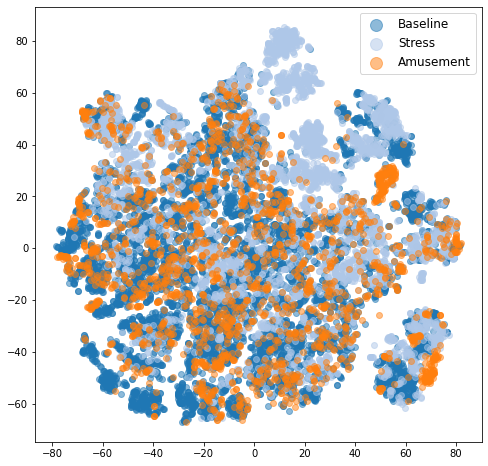

In [29]:
# Reference t-SNE: https://www.kaggle.com/code/colinmorris/visualizing-embeddings-with-t-sne
from sklearn.manifold import TSNE

# The default of 1,000 iterations gives fine results, but I'm training for longer just to eke
# out some marginal improvements. NB: This takes almost an hour!
tsne = TSNE(random_state=1, n_iter=1000, metric="cosine")

tsne_proj = tsne.fit_transform(embeddings_arrayNEW)
# Plot those points as a scatter plot and label them based on the pred labels
from matplotlib import cm
cmap = cm.get_cmap('tab20')
fig, ax = plt.subplots(figsize=(8,8))
num_categories = 3
# {'Anger': 0, 'Disgust': 1, 'Fear': 2, 'Happiness': 3, 'Neutral': 4, 'Sadness': 5}
labels = ['Baseline', 'Stress', 'Amusement']
for lab in range(num_categories):
    indices = np.array(y_trainmax)==lab
    ax.scatter(tsne_proj[indices,0],tsne_proj[indices,1], c=np.array(cmap(lab)).reshape(1,4), label = labels[lab] ,alpha=0.5)
ax.legend(fontsize='large', markerscale=2)
plt.savefig("./Vit3False0tsne")
plt.show()

In [7]:
def create_model():
    x = pretrained_model.output
    #x = GlobalAveragePooling2D()(x)
    # Add a fully connected layer
    x = Dense(128, activation='relu')(x)
    # Add a final softmax layer
    predictions = Dense(3, activation='softmax')(x)

    # Create the final model
    model = Model(inputs=pretrained_model.input, outputs=predictions)

    return model

leaf_model = create_model()

In [8]:
leaf_model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 embedding (Conv2D)          (None, 7, 7, 768)         2360064   
                                                                 
 reshape (Reshape)           (None, 49, 768)           0         
                                                                 
 class_token (ClassToken)    (None, 50, 768)           768       
                                                                 
 Transformer/posembed_input   (None, 50, 768)          38400     
 (AddPositionEmbs)                                               
                                                                 
 Transformer/encoderblock_0   ((None, 50, 768),        7087872   
 (TransformerBlock)           (None, 12, None, None))        

In [9]:
learning_rate = 1e-3
optimizer = tf.keras.optimizers.Adam(learning_rate = learning_rate)

leaf_model.compile(optimizer = optimizer,
              loss = tf.keras.losses.CategoricalCrossentropy(label_smoothing = 0.0001),
              metrics = 'accuracy')


reduce_lr = tf.keras.callbacks.ReduceLROnPlateau(monitor = 'val_accuracy',
                                                 factor = 0.2,
                                                 patience = 1,
                                                 verbose = 1,
                                                 min_delta = 1e-4,
                                                 min_lr = 1e-7,
                                                 mode = 'max')

earlystopping = tf.keras.callbacks.EarlyStopping(monitor = 'val_accuracy',
                                                 min_delta = 1e-4,
                                                 patience = 5,
                                                 mode = 'max',
                                                 restore_best_weights = True,
                                                 verbose = 1)

checkpointer = tf.keras.callbacks.ModelCheckpoint(filepath ='./ViT_model1_FALSE0.hdf5',
                                                  monitor = 'val_accuracy',
                                                  verbose = 1,
                                                  save_best_only = True,
                                                  save_weights_only = True,
                                                  mode = 'max')


In [10]:
int_epoch = 15
callbacks = [earlystopping, reduce_lr, checkpointer]

history = leaf_model.fit(x=X_train,
                         y=y_train,
                         validation_data=(X_val, y_val),  # Using test set as validation data
                         epochs=int_epoch,
                         callbacks=callbacks)

Epoch 1/15
387/387 [==============================] - ETA: 0s - loss: 0.8443 - accuracy: 0.6425
Epoch 1: val_accuracy improved from -inf to 0.67515, saving model to .\ViT_model1_FALSE0.hdf5
387/387 [==============================] - 708s 2s/step - loss: 0.8443 - accuracy: 0.6425 - val_loss: 0.7453 - val_accuracy: 0.6752 - lr: 0.0010
Epoch 2/15
387/387 [==============================] - ETA: 0s - loss: 0.7877 - accuracy: 0.6708
Epoch 2: val_accuracy improved from 0.67515 to 0.68727, saving model to .\ViT_model1_FALSE0.hdf5
387/387 [==============================] - 710s 2s/step - loss: 0.7877 - accuracy: 0.6708 - val_loss: 0.7241 - val_accuracy: 0.6873 - lr: 0.0010
Epoch 3/15
387/387 [==============================] - ETA: 0s - loss: 0.7782 - accuracy: 0.6746
Epoch 3: ReduceLROnPlateau reducing learning rate to 0.00020000000949949026.

Epoch 3: val_accuracy did not improve from 0.68727
387/387 [==============================] - 646s 2s/step - loss: 0.7782 - accuracy: 0.6746 - val_loss: 

In [11]:
print("Not using Gradient Centralization:")
print(f"Loss: {history.history['loss'][-1]}")
print(f"accuracy: {history.history['accuracy'][-1]}")
print(f"Validation accuracy: {history.history['val_accuracy'][-1]}")


Not using Gradient Centralization:
Loss: 0.728071928024292
accuracy: 0.6954236626625061
Validation accuracy: 0.7090908885002136


In [12]:
acc = history.history['accuracy']
print(max(acc))

0.6963939070701599


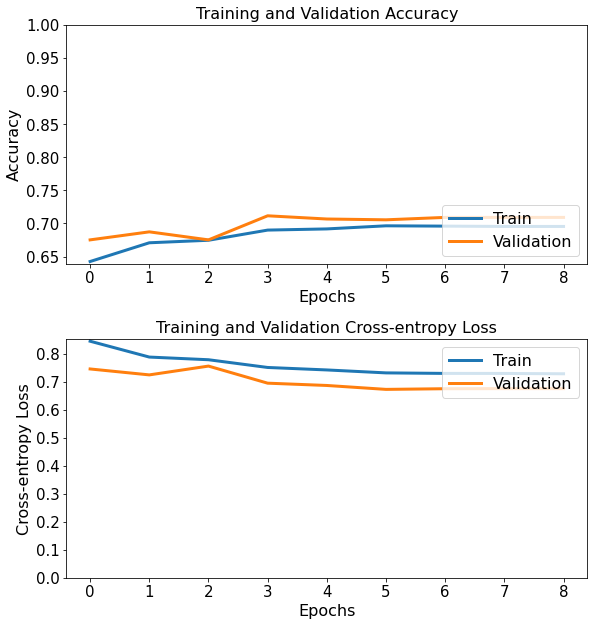

In [13]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']


plt.figure(figsize=(9, 9))
plt.subplot(2, 1, 1)
plt.tight_layout(pad=3.0)
plt.plot(acc, label='Train' , linewidth = 3)
plt.plot(val_acc, label='Validation', linewidth = 3)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.legend(loc='lower right' , prop={'size': 16})
plt.xlabel('Epochs', fontsize=16)
plt.ylabel('Accuracy' , fontsize=16)
plt.ylim([min(plt.ylim()),1])
plt.title('Training and Validation Accuracy', fontsize=16)

plt.subplot(2, 1, 2)
plt.tight_layout(pad=3.0)
plt.plot(loss, label='Train', linewidth = 3)
plt.plot(val_loss, label='Validation', linewidth = 3)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.legend(loc='upper right', prop={'size': 16})
plt.xlabel('Epochs', fontsize=16)
plt.ylabel('Cross-entropy Loss', fontsize=16)
plt.ylim([0,max(plt.ylim())])
plt.title('Training and Validation Cross-entropy Loss', fontsize=16)
plt.show()

In [14]:
def load_trained_model(weights_path):
   model = create_model()
   model.load_weights(weights_path)
   return model

In [15]:
new_model = load_trained_model('D:\WESAD_code\ViT_model1_FALSE0.hdf5')
new_model.summary()

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 embedding (Conv2D)          (None, 7, 7, 768)         2360064   
                                                                 
 reshape (Reshape)           (None, 49, 768)           0         
                                                                 
 class_token (ClassToken)    (None, 50, 768)           768       
                                                                 
 Transformer/posembed_input   (None, 50, 768)          38400     
 (AddPositionEmbs)                                               
                                                                 
 Transformer/encoderblock_0   ((None, 50, 768),        7087872   
 (TransformerBlock)           (None, 12, None, None))      

In [16]:
from sklearn.metrics import classification_report

y_pred = new_model.predict(X_val)
y_predargmax = np.argmax(y_pred, axis=1)
y_true = y_val

y_pred_categorical = np.zeros_like(y_true)
y_pred_categorical[np.arange(len(y_predargmax)), y_predargmax] = 1


clreport = classification_report(y_true, y_pred_categorical, digits=4)
print(clreport)

              precision    recall  f1-score   support

           0     0.6723    0.9252    0.7788       428
           1     0.8093    0.7992    0.8042       239
           2     0.0000    0.0000    0.0000       158

   micro avg     0.7115    0.7115    0.7115       825
   macro avg     0.4939    0.5748    0.5277       825
weighted avg     0.5833    0.7115    0.6370       825
 samples avg     0.7115    0.7115    0.7115       825



**Testing**

In [17]:
from sklearn.metrics import accuracy_score, classification_report

y_predt = new_model.predict(X_test)
y_predargmaxt = np.argmax(y_predt, axis=1)
y_truet = y_test

# Assuming y_predargmax and y_test are already defined
y_test_labels = np.argmax(y_test, axis=1)  # Convert one-hot encoded labels to integer labels
test_accuracy = accuracy_score(y_test_labels, y_predargmaxt)
print("Test Accuracy:", test_accuracy)

y_pred_categoricalt = np.zeros_like(y_truet)
y_pred_categoricalt[np.arange(len(y_predargmaxt)), y_predargmaxt] = 1


clreportt = classification_report(y_truet, y_pred_categoricalt, digits=4)
print(clreportt)

Test Accuracy: 0.7202182479539254
              precision    recall  f1-score   support

           0     0.6847    0.9216    0.7857      1748
           1     0.8077    0.7685    0.7876       989
           2     1.0000    0.0089    0.0176       562

   micro avg     0.7202    0.7202    0.7202      3299
   macro avg     0.8308    0.5663    0.5303      3299
weighted avg     0.7752    0.7202    0.6554      3299
 samples avg     0.7202    0.7202    0.7202      3299



In [18]:
import os
os.chdir(r'D:\WESAD_code')
r'ViT_model1_FALSE0.hdf5'

'ViT_model1_FALSE0.hdf5'

In [19]:
from IPython.display import FileLink
FileLink(r'ViT_model1_FALSE0.hdf5')

D:\WESAD_code\ViT_model1_FALSE0.hdf5

In [20]:
# auc score
from sklearn.metrics import roc_curve, roc_auc_score

auc = roc_auc_score(y_true, y_pred, multi_class='ovr')
print(auc)

0.8274588157569873


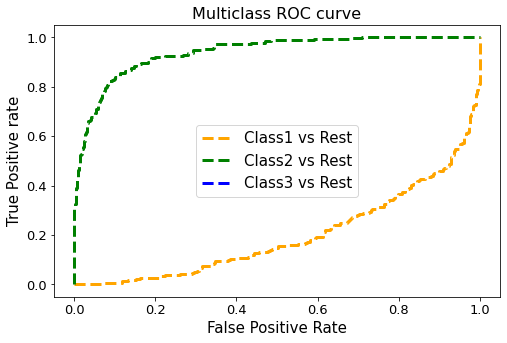

In [21]:
# roc curve for classes
fpr = {}
tpr = {}
thresh ={}

n_class = 3
# classes = ['Class 1','Class 2','Class 3']
for i in range(n_class):
    fpr[i], tpr[i], thresh[i] = roc_curve(y_true[:,i], y_pred[:,i], pos_label=i)

# plotting
plt.figure(figsize = (8,5))
colors = ['orange','green','blue']

for i in range(n_class):
    plt.plot(fpr[i], tpr[i], linestyle='--', linewidth=3, color=colors[i], label='Class{} vs Rest'.format(i+1))
    
plt.title('Multiclass ROC curve',fontsize = 16)
plt.xlabel('False Positive Rate',fontsize = 15)
plt.ylabel('True Positive rate',fontsize = 15)
plt.xticks(fontsize = 13)
plt.yticks(fontsize = 13)
plt.legend(loc='best',prop={'size': 15})
plt.show()